### QUESTAO 1 

### Quais são os países mais livres do mundo no ano de 2024?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dfPaises= pd.read_csv('world_happiness_report.csv')

df_2024 = dfPaises[dfPaises['Year'] == 2024]

max_freedom = df_2024['Freedom'].max()

    
paises_mais_livres = df_2024[df_2024['Freedom'] == max_freedom]['Country'].values

print("País(es) mais livre(s) em 2024:", paises_mais_livres)



País(es) mais livre(s) em 2024: ['UK' 'South Africa']


### QUESTAO 2

### Quais são os 3 países mais felizes?

Os 3 países mais felizes são:
      Country  Year  Happiness_Score
363     India  2022             8.00
3532   Canada  2019             8.00
3979  Germany  2017             7.99


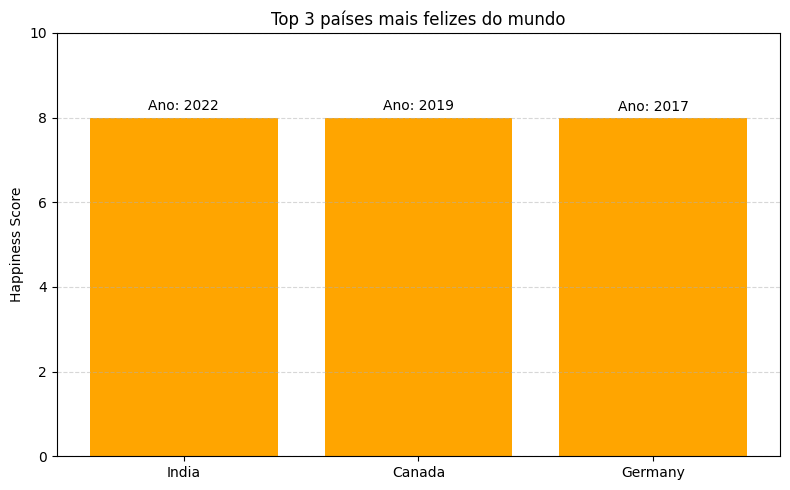

In [ ]:
idx_max_happiness = dfPaises.groupby('Country')['Happiness_Score'].idxmax()
df_felicidade_top = dfPaises.loc[idx_max_happiness][['Country', 'Year', 'Happiness_Score']]


top_3_felizes = df_felicidade_top.sort_values(by='Happiness_Score', ascending=False).head(3)


print("Os 3 países mais felizes são:")
print(top_3_felizes)

plt.figure(figsize=(8, 5))
bars = plt.bar(top_3_felizes['Country'], top_3_felizes['Happiness_Score'], color='orange')
plt.title('Top 3 países mais felizes do mundo')
plt.ylabel('Happiness Score')
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for bar, year in zip(bars, top_3_felizes['Year']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f"Ano: {int(year)}", 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### QUESTAO 3

### Qual foi o melhor ano da educação no Brasil?

In [ ]:
df_brasil = dfPaises[dfPaises['Country'] == 'Brazil']


melhor_ano = df_brasil.loc[df_brasil['Education_Index'].idxmax()]

print("Melhor ano da educação no Brasil:")
print(f"Ano: {int(melhor_ano['Year'])}")

Melhor ano da educação no Brasil:
Ano: 2013


### QUESTAO 4

### Gráfico comparando a confiança das pessoas nas instituições públicas durante os anos de 2005 ate 2024 no Brasil

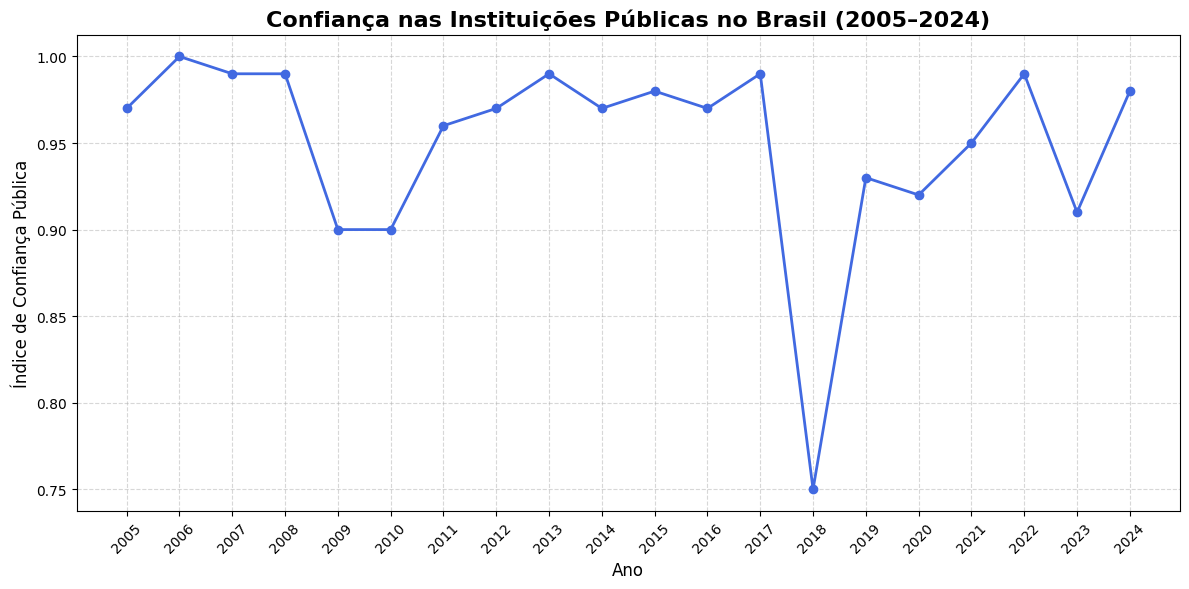

In [ ]:
df_brasil = dfPaises[(dfPaises['Country'] == 'Brazil') & (dfPaises['Year'].between(2005, 2024))]


df_brasil = df_brasil.sort_values(by='Public_Trust', ascending=False).drop_duplicates(subset='Year')
df_brasil = df_brasil.sort_values(by='Year')


plt.figure(figsize=(12, 6))
plt.plot(df_brasil['Year'], df_brasil['Public_Trust'], marker='o', linestyle='-', color='royalblue', linewidth=2)


plt.title('Confiança nas Instituições Públicas no Brasil (2005–2024)', fontsize=16, fontweight='bold')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Índice de Confiança Pública', fontsize=12)
plt.xticks(df_brasil['Year'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

### Questao 5

### Saúde Pública vs Felicidade e expectativa de vida saúdavel no Brasil

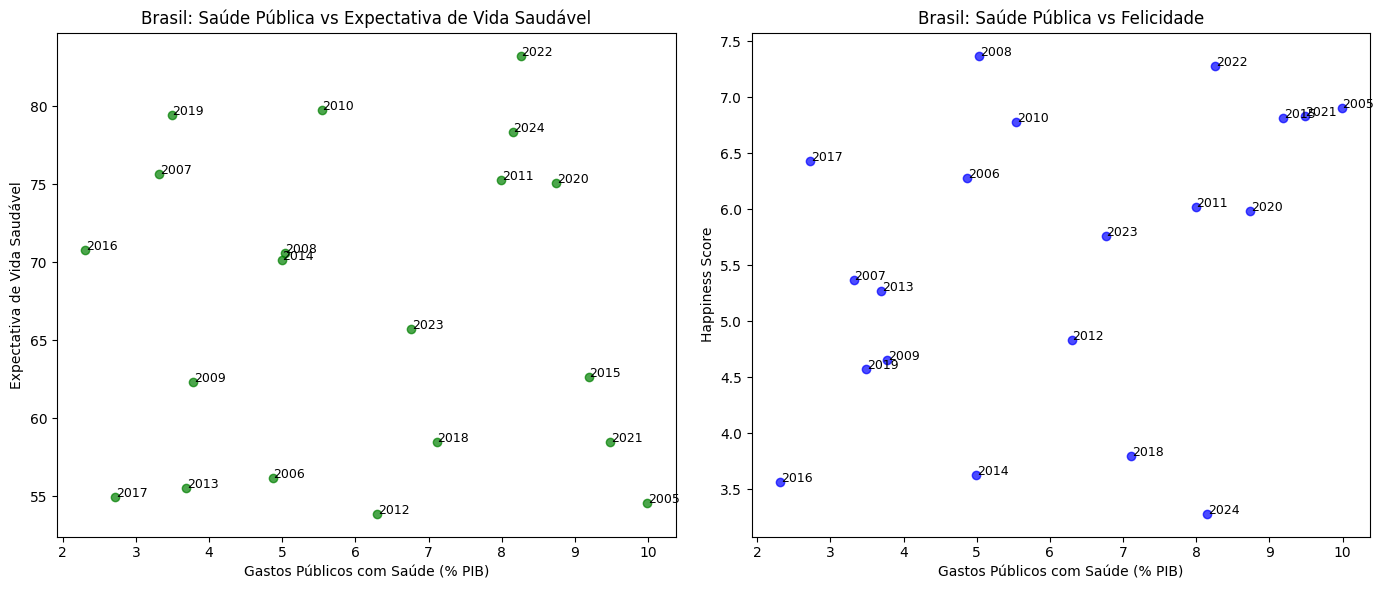

In [ ]:

df_brasil = dfPaises[dfPaises['Country'] == 'Brazil']
df_brasil = df_brasil[['Year', 'Public_Health_Expenditure', 'Healthy_Life_Expectancy', 'Happiness_Score']]
df_brasil = df_brasil.dropna().drop_duplicates(subset='Year')


fig, axs = plt.subplots(1, 2, figsize=(14, 6))


axs[0].scatter(df_brasil['Public_Health_Expenditure'], df_brasil['Healthy_Life_Expectancy'], color='green', alpha=0.7)
for _, row in df_brasil.iterrows():
    axs[0].text(row['Public_Health_Expenditure'] + 0.01, row['Healthy_Life_Expectancy'], str(int(row['Year'])), fontsize=9)
axs[0].set_title('Brasil: Saúde Pública vs Expectativa de Vida Saudável')
axs[0].set_xlabel('Gastos Públicos com Saúde (% PIB)')
axs[0].set_ylabel('Expectativa de Vida Saudável')


axs[1].scatter(df_brasil['Public_Health_Expenditure'], df_brasil['Happiness_Score'], color='blue', alpha=0.7)
for _, row in df_brasil.iterrows():
    axs[1].text(row['Public_Health_Expenditure'] + 0.01, row['Happiness_Score'], str(int(row['Year'])), fontsize=9)
axs[1].set_title('Brasil: Saúde Pública vs Felicidade')
axs[1].set_xlabel('Gastos Públicos com Saúde (% PIB)')
axs[1].set_ylabel('Happiness Score')

plt.tight_layout()
plt.show()


### Questão 6

### Desigualdade de Renda no Brasil ao longo dos anos

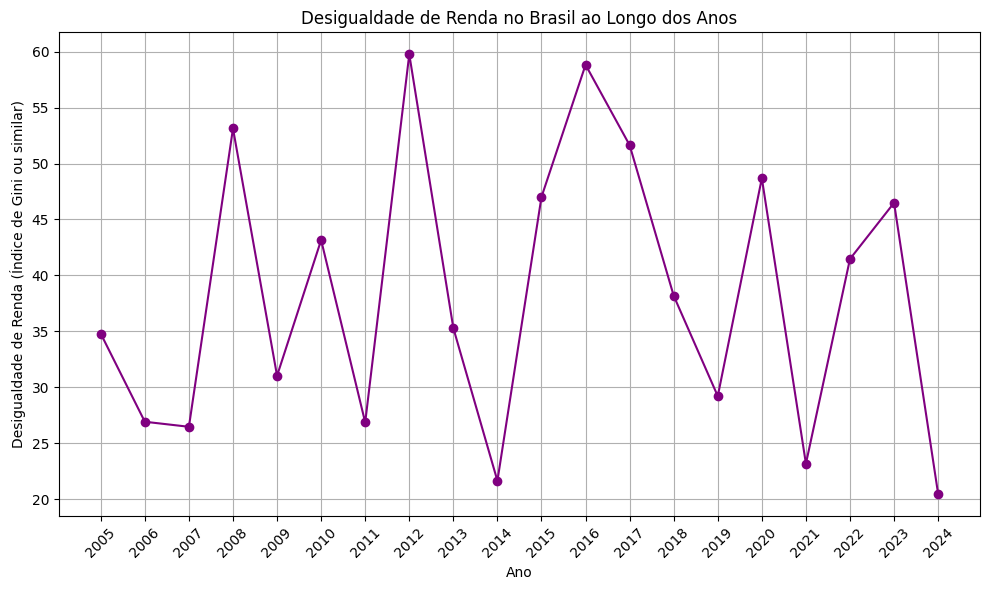

In [ ]:
df_brasil = dfPaises[dfPaises['Country'] == 'Brazil']
df_brasil = df_brasil[['Year', 'Income_Inequality']].dropna().drop_duplicates(subset='Year')
df_brasil = df_brasil.sort_values(by='Year')


plt.figure(figsize=(10, 6))
plt.plot(df_brasil['Year'], df_brasil['Income_Inequality'], marker='o', linestyle='-', color='purple')
plt.title('Desigualdade de Renda no Brasil ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Desigualdade de Renda (Índice de Gini ou similar)')
plt.grid(True)
plt.xticks(df_brasil['Year'], rotation=45)
plt.tight_layout()
plt.show()

### Questão 7

### Taxa de emprego e de criminalidade no Brasil

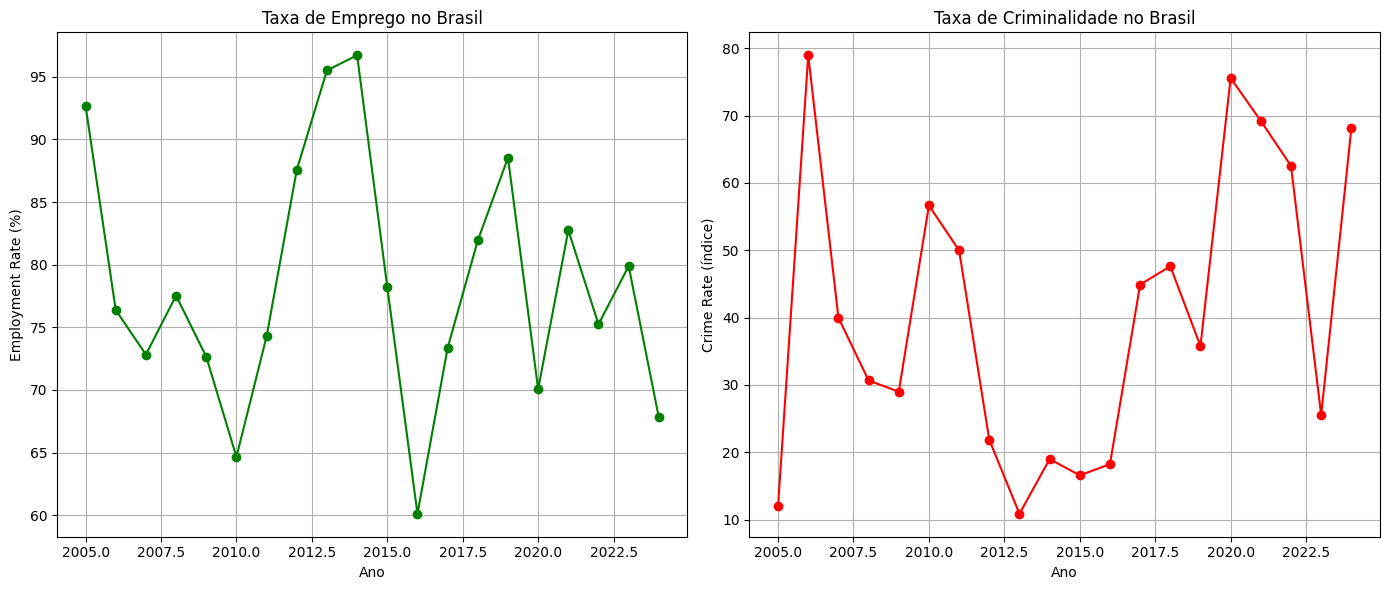

In [ ]:
df_brasil = dfPaises[dfPaises['Country'] == 'Brazil']
df_brasil = df_brasil[['Year', 'Employment_Rate', 'Crime_Rate']].dropna().drop_duplicates(subset='Year')
df_brasil = df_brasil.sort_values(by='Year')


fig, axs = plt.subplots(1, 2, figsize=(14, 6))


axs[0].plot(df_brasil['Year'], df_brasil['Employment_Rate'], marker='o', color='green')
axs[0].set_title('Taxa de Emprego no Brasil')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Employment Rate (%)')
axs[0].grid(True)


axs[1].plot(df_brasil['Year'], df_brasil['Crime_Rate'], marker='o', color='red')
axs[1].set_title('Taxa de Criminalidade no Brasil')
axs[1].set_xlabel('Ano')
axs[1].set_ylabel('Crime Rate (índice)')
axs[1].grid(True)

plt.tight_layout()
plt.show()

### Questão 8

### Evolução da expectativa de vida no brasil

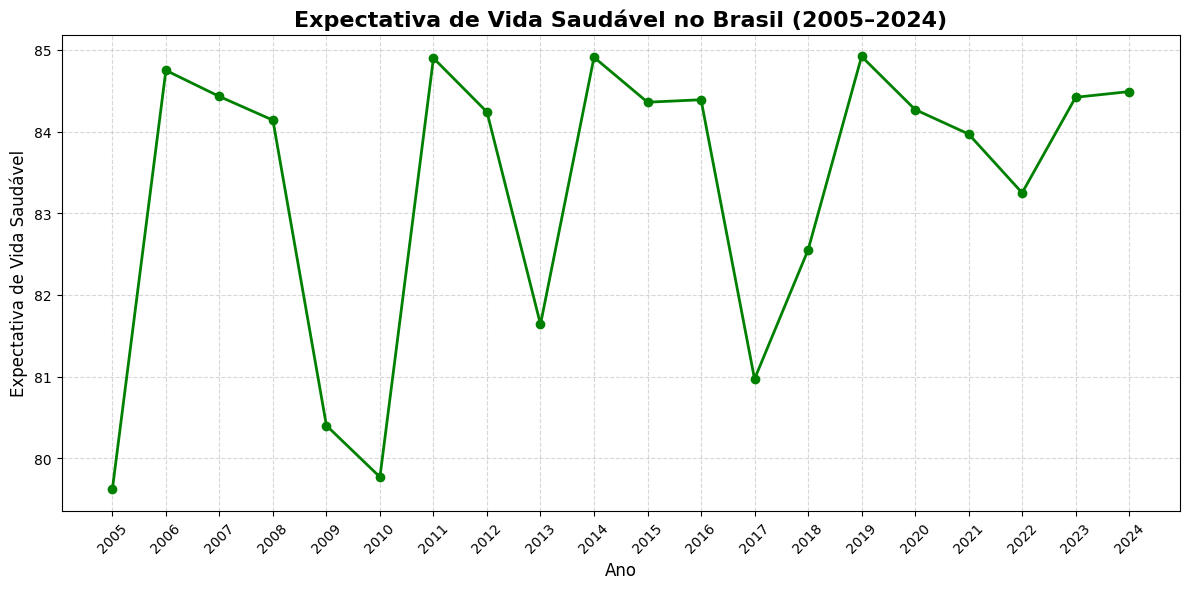

In [ ]:
df_brasil = dfPaises[(dfPaises['Country'] == 'Brazil') & (dfPaises['Year'].between(2005, 2024))]


df_brasil = df_brasil.sort_values(by='Healthy_Life_Expectancy', ascending=False).drop_duplicates(subset='Year')


df_brasil = df_brasil.sort_values(by='Year')


plt.figure(figsize=(12, 6))
plt.plot(df_brasil['Year'], df_brasil['Healthy_Life_Expectancy'], marker='o', linestyle='-', color='green', linewidth=2)


plt.title('Expectativa de Vida Saudável no Brasil (2005–2024)', fontsize=16, fontweight='bold')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Expectativa de Vida Saudável', fontsize=12)
plt.xticks(df_brasil['Year'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()


plt.show()

### Questão 9

### Liberdade X Felicidade no Brasil ao longo dos anos

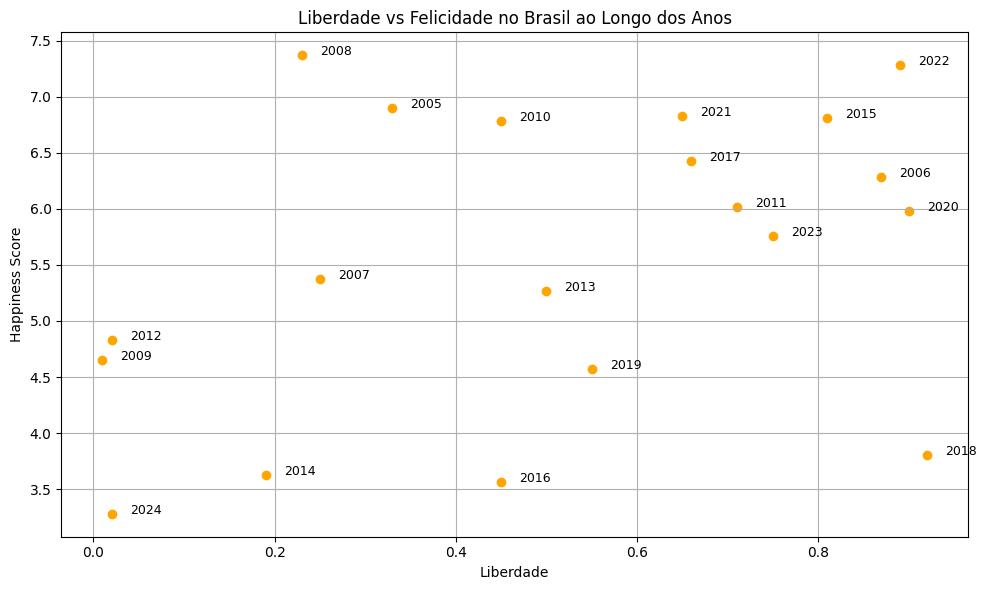

In [ ]:
df_brasil = dfPaises[dfPaises['Country'] == 'Brazil']
df_brasil = df_brasil[['Year', 'Freedom', 'Happiness_Score']].dropna().drop_duplicates(subset='Year')
df_brasil = df_brasil.sort_values(by='Year')


plt.figure(figsize=(10, 6))
plt.scatter(df_brasil['Freedom'], df_brasil['Happiness_Score'], color='orange')


for _, row in df_brasil.iterrows():
    plt.text(row['Freedom'] + 0.02, row['Happiness_Score'], str(int(row['Year'])), fontsize=9)


plt.title('Liberdade vs Felicidade no Brasil ao Longo dos Anos')
plt.xlabel('Liberdade')
plt.ylabel('Happiness Score')


plt.grid(True)
plt.tight_layout()
plt.show()

### Questão 10

### Desemprego X Felicidade e taxa de desemprego, No Brasil

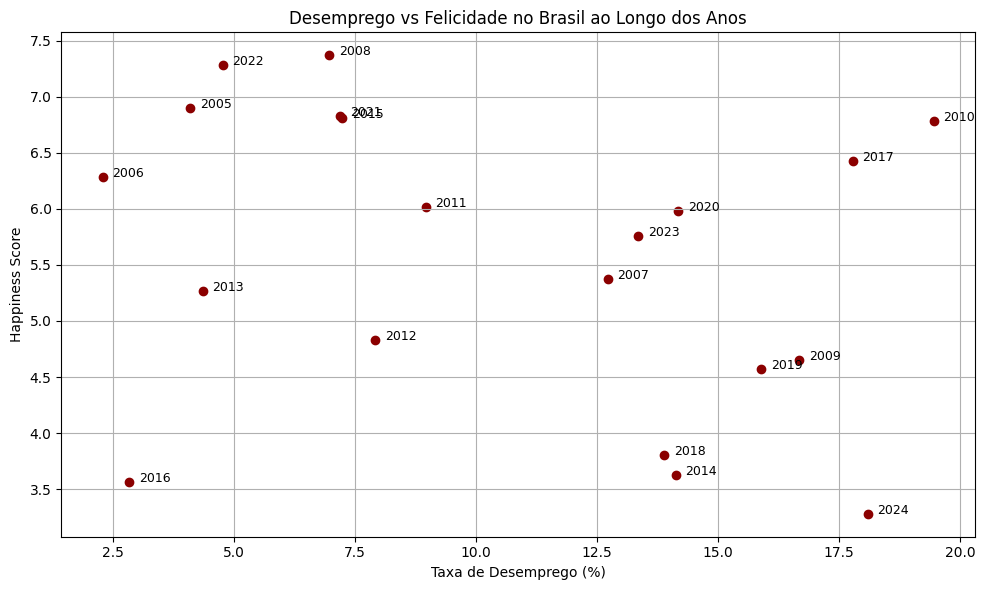

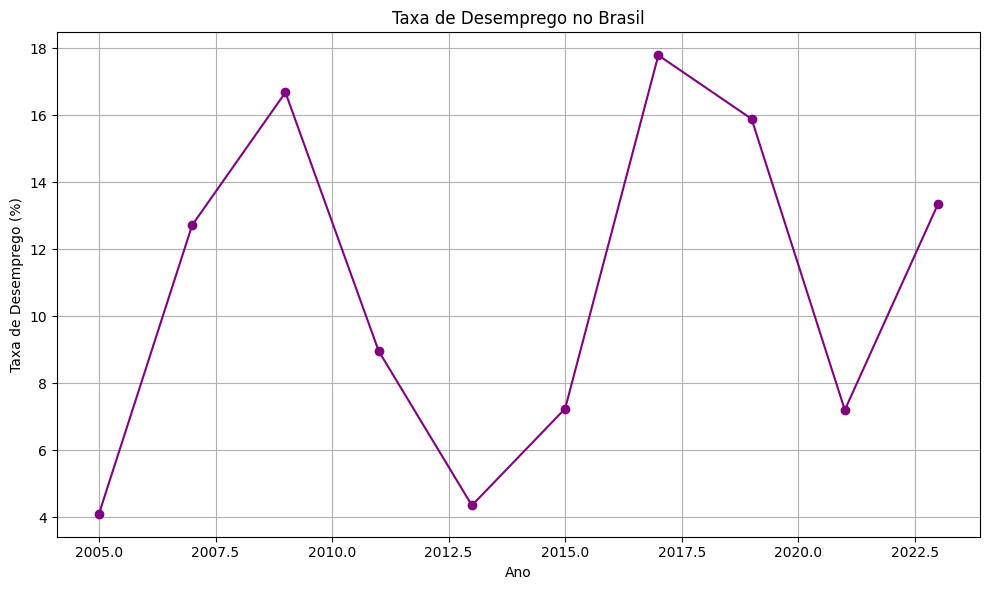

In [ ]:
df_brasil = dfPaises[dfPaises['Country'] == 'Brazil']
df_brasil = df_brasil[['Year', 'Unemployment_Rate', 'Happiness_Score']].dropna().drop_duplicates(subset='Year')
df_brasil = df_brasil.sort_values(by='Year')


plt.figure(figsize=(10, 6))
plt.scatter(df_brasil['Unemployment_Rate'], df_brasil['Happiness_Score'], color='darkred')


for _, row in df_brasil.iterrows():
    plt.text(row['Unemployment_Rate'] + 0.2, row['Happiness_Score'], str(int(row['Year'])), fontsize=9)


plt.title('Desemprego vs Felicidade no Brasil ao Longo dos Anos')
plt.xlabel('Taxa de Desemprego (%)')
plt.ylabel('Happiness Score')


plt.grid(True)
plt.tight_layout()
plt.show()


df = pd.read_csv('world_happiness_report.csv')


brazil_unemployment_data = df[df['Country'] == 'Brazil']
brazil_unemployment_data = brazil_unemployment_data[(brazil_unemployment_data['Year']) & (brazil_unemployment_data['Year'] <= 2024)]


brazil_unemployment_data = brazil_unemployment_data.drop_duplicates(subset=['Year'])


brazil_unemployment_data = brazil_unemployment_data.sort_values(by='Year')


plt.figure(figsize=(10, 6))
plt.plot(brazil_unemployment_data['Year'], brazil_unemployment_data['Unemployment_Rate'], marker='o', color='purple', linestyle='-', markersize=6)

plt.title('Taxa de Desemprego no Brasil')
plt.xlabel('Ano')
plt.ylabel('Taxa de Desemprego (%)')
plt.grid(True)
plt.tight_layout()
plt.show()